# Project 1

### Import Data Set 1

In [6]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import csv

rows = []

with open("dataset1.csv", "r") as f:
    reader = csv.reader(f)
    for row in reader:
        new_row = []
        for col in row:
            new_row.append(float(col))
        rows.append(new_row)
        
rows = np.array(rows)

## 1.1 Plots

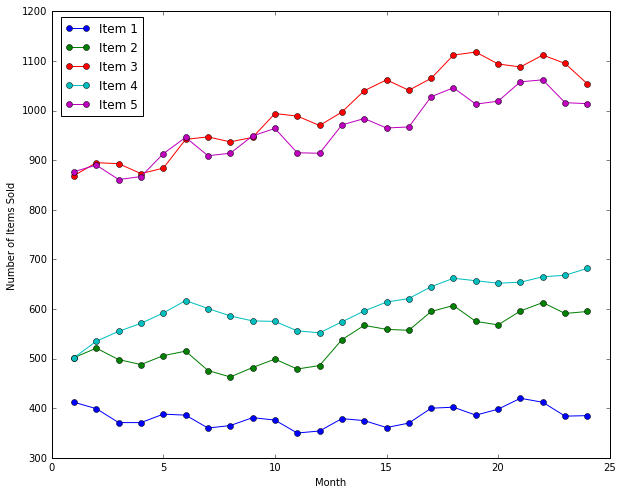

In [130]:
x = np.linspace(1, len(rows[0]), (len(rows[0])))
colors = ["b", "g", "r", "c", "m"]

count = 0
plt.figure(figsize=(10,8))

for row in rows:
    label_str = "Item " + str(count+1)
    plt.plot(x, row, color = colors[count], marker = "o", label = label_str)
    count += 1

plt.xlabel("Month")
plt.ylabel("Number of Items Sold")
plt.legend(bbox_to_anchor=(0.26, 0.9), bbox_transform=plt.gcf().transFigure)
plt.show()

### 3. Least Square Solvers

In [26]:
def least_norme(X, y):
    X_X = np.transpose(X).dot(X)
    X_y = np.transpose(X).dot(y)
    R_R = np.linalg.cholesky(X_X)
    w = np.linalg.solve(R_R, X_y)
    x = np.linalg.solve(np.transpose(R_R), w)
    return x

def least_qr(X, y):
    Q, R = np.linalg.qr(X)
    x = np.linalg.solve(R, np.transpose(Q).dot(y))
    return x

def least_svd(X, y):
    U,s,V_t = np.linalg.svd(X,False)
    U_y = np.transpose(U).dot(y)
    w = np.linalg.inv(np.diag(s)).dot(U_y)
    x = np.transpose(V_t).dot(w)
    return x

I need basis for 4, 12 and 24 month periods.

In [44]:
A = np.zeros((len(rows[0]),8))
for t in range(len(rows[0])):
    A[t] = np.array([1.0,1.0*t,np.sin(0.5*np.pi*t),np.cos(0.5*np.pi*t),np.sin(np.pi*t/6),np.cos(np.pi*t/6),np.sin(np.pi*t/12),np.cos(np.pi*t/12)])

### Normal Equations Regressions

Black lines are regressions of each item.

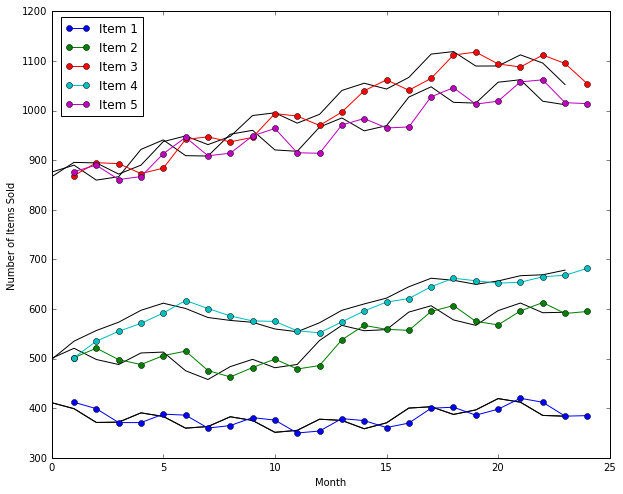

In [45]:
plt.figure(figsize=(10,8))

norme_coefficients = []
for row in rows:
    b = least_norme(A, row)
    norme_coefficients.append(b)
    regress = np.dot(A, b)
    plt.plot(regress, "k")

x = np.linspace(1, len(rows[0]), (len(rows[0])))
colors = ["b", "g", "r", "c", "m"]

count = 0
plt.plot(item_1, "k")

for row in rows:
    label_str = "Item " + str(count+1)
    plt.plot(x, row, color = colors[count], marker = "o", label = label_str)
    count += 1

plt.xlabel("Month")
plt.ylabel("Number of Items Sold")
plt.legend(bbox_to_anchor=(0.26, 0.9), bbox_transform=plt.gcf().transFigure)
plt.show()

### QR Decomposition Regressions

Black lines are regressions of each item.

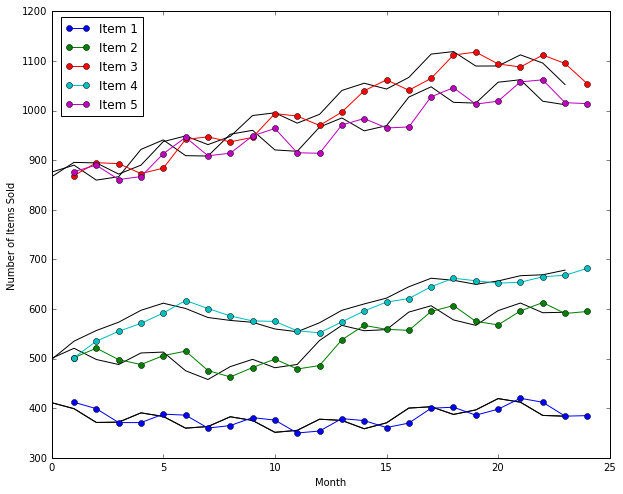

In [46]:
plt.figure(figsize=(10,8))

qr_coefficients = []
for row in rows:
    b = least_qr(A, row)
    qr_coefficients.append(b)
    regress = np.dot(A, b)
    plt.plot(regress, "k")

x = np.linspace(1, len(rows[0]), (len(rows[0])))
colors = ["b", "g", "r", "c", "m"]

count = 0
plt.plot(item_1, "k")

for row in rows:
    label_str = "Item " + str(count+1)
    plt.plot(x, row, color = colors[count], marker = "o", label = label_str)
    count += 1

plt.xlabel("Month")
plt.ylabel("Number of Items Sold")
plt.legend(bbox_to_anchor=(0.26, 0.9), bbox_transform=plt.gcf().transFigure)
plt.show()

### SVD Decomposition Regressions

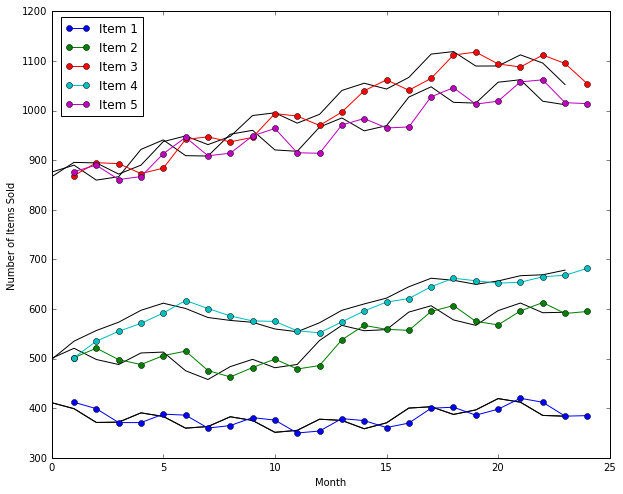

In [47]:
plt.figure(figsize=(10,8))

svd_coefficients = []
for row in rows:
    b = least_svd(A, row)
    svd_coefficients.append(b)
    regress = np.dot(A, b)
    plt.plot(regress, "k")

x = np.linspace(1, len(rows[0]), (len(rows[0])))
colors = ["b", "g", "r", "c", "m"]

count = 0
plt.plot(item_1, "k")

for row in rows:
    label_str = "Item " + str(count+1)
    plt.plot(x, row, color = colors[count], marker = "o", label = label_str)
    count += 1

plt.xlabel("Month")
plt.ylabel("Number of Items Sold")
plt.legend(bbox_to_anchor=(0.26, 0.9), bbox_transform=plt.gcf().transFigure)
plt.show()

### Predictions for next 6 months

In [66]:
def printArray(args):
    for arg in args:
        print(arg + "\t\t")

In [67]:
A_next = np.zeros((6,8))
for i in range(6):
    t = i + len(rows[0])
    A_next[i] = np.array([1.0,1.0*t,np.sin(0.5*np.pi*t),np.cos(0.5*np.pi*t),np.sin(np.pi*t/6),np.cos(np.pi*t/6),np.sin(np.pi*t/12),np.cos(np.pi*t/12)])

In [86]:
predictions_norme = []
predictions_qr = []
predictions_svd = []

for i in range(len(rows)):
    E = np.zeros((3,3))
    pred_norme = []
    pred_qr = []
    pred_svd = []
    for j in range(6):
        yNormal = np.dot(A_next[j],norme_coefficients[i])
        yQR = np.dot(A_next[j],qr_coefficients[i])
        ySVD = np.dot(A_next[j],svd_coefficients[i])
        pred_norme.append(yNormal)
        pred_qr.append(yQR)
        pred_svd.append(ySVD)
        E[0,1] += 1.0*np.abs(yNormal - yQR)/yQR
        E[1,0] = E[1,0] + abs(yNormal - yQR)/yNormal
        E[0,2] = E[0,2] + abs(yNormal - ySVD)/ySVD
        E[2,0] = E[2,0] + abs(yNormal - ySVD)/yNormal
        E[1,2] = E[1,2] + abs(yQR - ySVD)/ySVD
        E[2,1] = E[2,1] + abs(yQR - ySVD)/yQR
    predictions_norme.append(pred_norme)
    predictions_qr.append(pred_qr)
    predictions_svd.append(pred_svd)
    print("Error table for item",i+1)
    print(np.matrix(E))

Error table for item 1
[[  0.00000000e+00   5.95400999e-14   5.76733720e-14]
 [  5.95400999e-14   0.00000000e+00   1.86672798e-15]
 [  5.76733720e-14   1.86672798e-15   0.00000000e+00]]
Error table for item 2
[[  0.00000000e+00   4.36378201e-14   4.41605803e-14]
 [  4.36378201e-14   0.00000000e+00   8.88951071e-16]
 [  4.41605803e-14   8.88951071e-16   0.00000000e+00]]
Error table for item 3
[[  0.00000000e+00   4.22427048e-14   3.78066046e-14]
 [  4.22427048e-14   0.00000000e+00   4.43610027e-15]
 [  3.78066046e-14   4.43610027e-15   0.00000000e+00]]
Error table for item 4
[[  0.00000000e+00   3.93900781e-14   3.84007628e-14]
 [  3.93900781e-14   0.00000000e+00   1.30943707e-15]
 [  3.84007628e-14   1.30943707e-15   0.00000000e+00]]
Error table for item 5
[[  0.00000000e+00   3.31902996e-14   3.71885734e-14]
 [  3.31902996e-14   0.00000000e+00   3.99827383e-15]
 [  3.71885734e-14   3.99827383e-15   0.00000000e+00]]


Predictions with Normal Equations for item 1
[398.43962294721979, 386.35447492450862, 358.57893734257232, 359.19057804682529, 377.9470903663954, 370.71707152906316]
Predictions with QR Factorization for item 1
[398.43962294722235, 386.35447492451192, 358.57893734257584, 359.19057804682922, 377.94709036639995, 370.71707152906754]
Predictions with SVD Decomposition for item 1
[398.43962294722235, 386.35447492451192, 358.57893734257561, 359.19057804682905, 377.94709036639978, 370.71707152906743]
Predictions with Normal Equations for item 2
[633.50728675773109, 653.64052520480482, 631.01725399110967, 620.91576100994621, 644.19228315518171, 645.98079772548556]
Predictions with QR Factorization for item 2
[633.50728675773428, 653.64052520480902, 631.0172539911141, 620.91576100995121, 644.19228315518728, 645.98079772549102]
Predictions with SVD Decomposition for item 2
[633.50728675773439, 653.64052520480914, 631.0172539911141, 620.9157610099511, 644.1922831551874, 645.98079772549113]
Predict

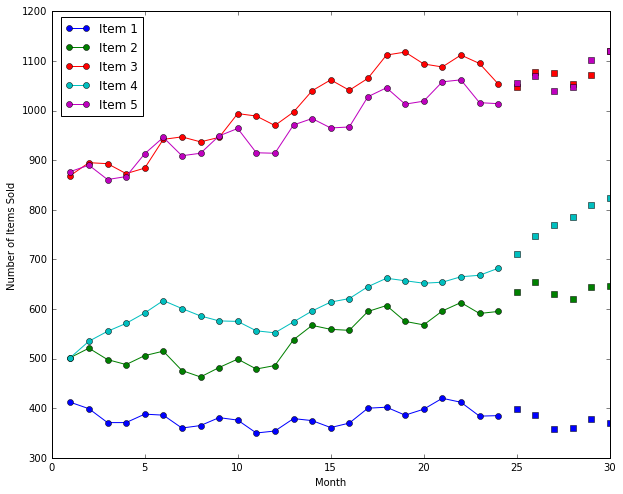

In [102]:
x = np.linspace(1, len(rows[0]), (len(rows[0])))
colors = ["b", "g", "r", "c", "m"]

count = 0
plt.figure(figsize=(10,8))

for row in rows:
    label_str = "Item " + str(count+1)
    plt.plot(x, row, color = colors[count], marker = "o", label = label_str)
    count += 1

plt.xlabel("Month")
plt.ylabel("Number of Items Sold")
plt.legend(bbox_to_anchor=(0.26, 0.9), bbox_transform=plt.gcf().transFigure)

pred_x = np.linspace(25, 30, 6)

for i in range(len(rows)):
    print("Predictions with Normal Equations for item",i+1)
    print(predictions_norme[i])
    plt.plot(pred_x, predictions_norme[i], colors[i] + "s")
    print("Predictions with QR Factorization for item",i+1)
    print(predictions_qr[i])
    print("Predictions with SVD Decomposition for item",i+1)
    print(predictions_svd[i])